In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Importing Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM,Bidirectional
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from matplotlib.patches import Rectangle

In [9]:
df = pd.read_excel('(미디어에버) BioParticle Counter 6개월 측정 20230314.xlsx',
                   sheet_name='data',
                  header=1)

In [10]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.dtypes

Day      datetime64[ns]
Time             object
Bio              object
Dust             object
T               float64
H               float64
PM2.5           float64
dtype: object

In [13]:
df['Dust']=df['Dust'].astype(int)
df['Bio']=df['Bio'].astype(int)

In [14]:
df['Date_Time']=df['Day'].astype(str)+' '+df['Time'].astype(str)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [15]:
#df1=df1[['Date_Time', 'PM2.5(ug/m3)', 'PM10(ug/m3)','co(ppm  )', 'no2(ppm  )', 'o3(ppm  )']]
#df = df.resample('H', on='Date_Time').sum()
#df=df.reset_index()
df['Date_Time'] =df['Date_Time'].values.astype(np.int64) // 10 ** 9

In [16]:
df

,Day,Time,Bio,Dust,T,H,PM2.5,Date_Time
1,2022-05-01,00:03:29,11,34254,25.5,27.0,30.984,1651363409
2,2022-05-01,00:07:36,19,33980,25.5,27.0,30.750,1651363656
3,2022-05-01,00:11:43,28,33378,25.5,27.0,30.235,1651363903
4,2022-05-01,00:15:50,47,33092,25.5,27.0,29.990,1651364150
5,2022-05-01,00:19:57,7,32859,25.5,27.0,29.790,1651364397
...,...,...,...,...,...,...,...,...
63637,2022-11-20,07:53:02,487,53460,21.0,33.0,46.991,1668930782
63638,2022-11-20,07:57:08,578,53567,21.0,33.0,47.079,1668931028
63639,2022-11-20,08:01:14,424,51910,21.0,33.0,45.726,1668931274
63640,2022-11-20,08:05:20,596,52928,21.0,33.0,46.558,1668931520


In [17]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()

In [18]:
df.drop(['Day','Time'],axis=1,inplace=True)

In [19]:
X=df.drop('PM2.5',axis=1)
Y=df['PM2.5']

In [20]:
X=minmax_scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [22]:
y_test.shape

(15911,)

In [23]:
def willmott_index(observed, predicted):
    mean_observed = np.mean(observed)
    numerator = np.sum(np.abs(observed - predicted))
    denominator = np.sum(np.abs(observed - mean_observed))
    wi = (1 - (numerator / denominator))
    return wi

In [24]:
train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []
cv_scores=[]

In [25]:
models_names=['Ridge','LR','KNN Regressor','RF Regressor','DT Regressor','SGD Regressor','SV Regressor']

+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.7369103445482706
--------------------------------------------------
Mean absolute error (MAE) :  0.48612647085905714
--------------------------------------------------
R2 score :  0.9989410747144734
--------------------------------------------------
Willmott's Index: 0.9721302064270956
--------------------------------------------------


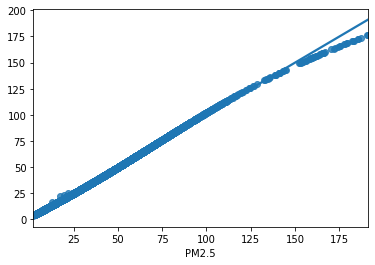

							-----------------------------------------------------------
							 Time for detection (Ridge) : 1.626 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For LinearRegression The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.7369001591244715
--------------------------------------------------
Mean absolute error (MAE) :  0.485984093240862
--------------------------------------------------
R2 score :  0.9989411039867677
--------------------------------------------------
Willmott's Index: 0.972138368983686
--------------------------------------------------


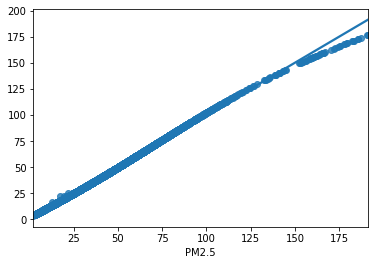

							-----------------------------------------------------------
							 Time for detection (LinearRegression) : 1.408 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For KNeighborsRegressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.8806034168062862
--------------------------------------------------
Mean absolute error (MAE) :  0.45353242410910694
--------------------------------------------------
R2 score :  0.9984878434846799
--------------------------------------------------
Willmott's Index: 0.9739988340560775
--------------------------------------------------


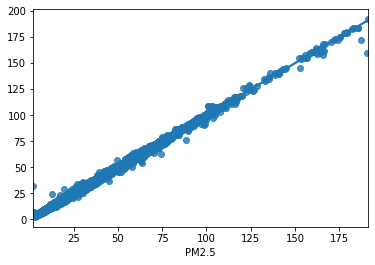

							-----------------------------------------------------------
							 Time for detection (KNeighborsRegressor) : 4.73 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.10475384172504716
--------------------------------------------------
Mean absolute error (MAE) :  0.0039015737540065687
--------------------------------------------------
R2 score :  0.9999786018646165
--------------------------------------------------
Willmott's Index: 0.9997763214684823
--------------------------------------------------


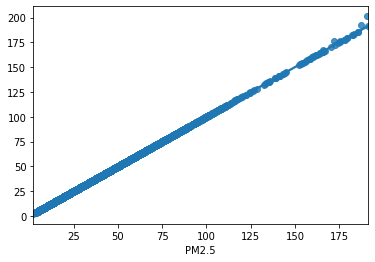

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 98.692 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Decision Tree The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.3543776813081838
--------------------------------------------------
Mean absolute error (MAE) :  0.008757777638112042
--------------------------------------------------
R2 score :  0.9997551113049227
--------------------------------------------------
Willmott's Index: 0.9994979136715179
--------------------------------------------------


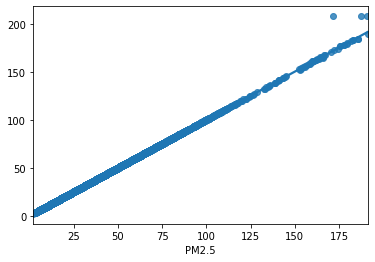

							-----------------------------------------------------------
							 Time for detection (Decision Tree) : 2.778 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			6-For SGD Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.7598628880247746
--------------------------------------------------
Mean absolute error (MAE) :  0.4980514635093911
--------------------------------------------------
R2 score :  0.9988740827305749
--------------------------------------------------
Willmott's Index: 0.9714465425999933
--------------------------------------------------


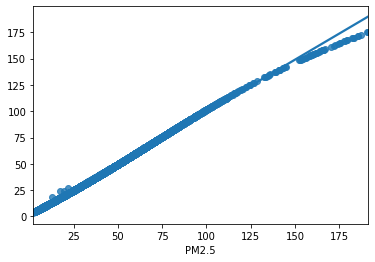

							-----------------------------------------------------------
							 Time for detection (SGD Regressor) : 2.954 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			7-For SV Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  1.3393249003536196
--------------------------------------------------
Mean absolute error (MAE) :  0.2697452923631972
--------------------------------------------------
R2 score :  0.9965020958963806
--------------------------------------------------
Willmott's Index: 0.9845354119430277
--------------------------------------------------


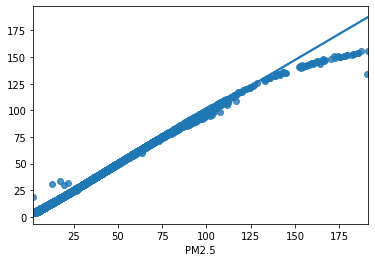

							-----------------------------------------------------------
							 Time for detection (SV Regressor) : 1034.97 seconds...
							-----------------------------------------------------------



In [30]:

# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('SGD Regressor', SGDRegressor()))
models.append(('SV Regressor', SVR()))


train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []
cv_scores=[]

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)
    scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
    cv_scores.append(scores)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
    wi = willmott_index(y_test, predictions)
    print(f"Willmott's Index: {wi}")
    wi_l.append(wi)
    print("-"*50)
    wi = willmott_index(y_test, predictions)
    
    
    sns.regplot(x=y_test,y=predictions)
    plt.show()
        
        
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    


In [34]:
report = pd.DataFrame({"Model": models_names,
                     "Training Score": train_l,
                     "Testing Score": test_l, "MAE": mae_l,
                     "RMSE": rmse_l,
                     "R2 Score": r2_l,
                     "CV Scores":cv_scores,
                    "Willmot Index": wi_l})
report

,Model,Training Score,Testing Score,MAE,RMSE,R2 Score,CV Scores,Willmot Index
0,Ridge,0.998815,0.998941,0.486126,0.736910,0.998941,"[0.9978205456048388, 0.999079477292849, 0.9992...",0.972130
1,LR,0.998818,0.998941,0.485984,0.736900,0.998941,"[0.9979043324369953, 0.9990317731283679, 0.999...",0.972138
2,KNN Regressor,0.998717,0.998488,0.453532,0.880603,0.998488,"[0.8768243238281342, 0.9563106596312481, 0.960...",0.973999
3,RF Regressor,0.999990,0.999979,0.003902,0.104754,0.999979,"[0.9994946264273424, 0.9999931220133307, 0.999...",0.999776
4,DT Regressor,1.000000,0.999755,0.008758,0.354378,0.999755,"[0.999484720245561, 0.9999971592672525, 0.9999...",0.999498
5,SGD Regressor,0.998738,0.998874,0.498051,0.759863,0.998874,"[0.9972905559989336, 0.9992070002024396, 0.999...",0.971447
6,SV Regressor,0.995497,0.996502,0.269745,1.339325,0.996502,"[0.9525650442009451, 0.9983582635205419, 0.999...",0.984535


In [20]:
# Reshape the input data to match LSTM layer input shape
train_data = np.resize(X_train, (X_train.shape[0], X_train.shape[1], 1))
test_data = np.resize(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
train_data.shape

(47730, 5, 1)

In [22]:
train_labels=y_train
test_labels=y_test

In [24]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_data.shape[1], train_data.shape[2]),return_sequences=True))  # LSTM layer with 64 units
model.add(LSTM(64, return_sequences=True))
model.add(Dense(1))  # Output layer with single neuron

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
#model.fit(train_data, train_labels, epochs=10, batch_size=32)

# Evaluate the model
#loss = model.evaluate(test_data, test_labels)
#print('Test Loss:', loss)

# Make predictions
#predictions = model.predict(test_data)



Epoch 1/50
1492/1492 [==============================] - 28s 13ms/step - loss: 611.3555 - val_loss: 520.2394
Epoch 2/50
1492/1492 [==============================] - 19s 13ms/step - loss: 519.7622 - val_loss: 519.7694
Epoch 3/50
1492/1492 [==============================] - 19s 13ms/step - loss: 519.4790 - val_loss: 519.4117
Epoch 4/50
1492/1492 [==============================] - 19s 12ms/step - loss: 519.4275 - val_loss: 519.4622
Epoch 5/50
1492/1492 [==============================] - 18s 12ms/step - loss: 519.3065 - val_loss: 519.1920
Epoch 6/50
1492/1492 [==============================] - 18s 12ms/step - loss: 519.2493 - val_loss: 519.1257
Epoch 7/50
1492/1492 [==============================] - 20s 13ms/step - loss: 519.1285 - val_loss: 519.0731
Epoch 8/50
1492/1492 [==============================] - 18s 12ms/step - loss: 518.6638 - val_loss: 515.7906
Epoch 9/50
1492/1492 [==============================] - 19s 13ms/step - loss: 452.4042 - val_loss: 400.6554
Epoch 10/50
1492/1492 [=====

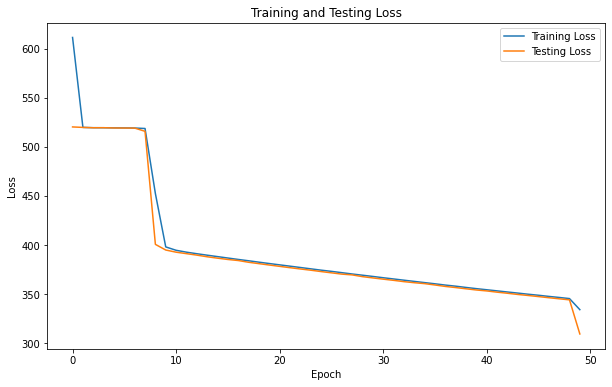

In [25]:
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

Epoch 1/50
1492/1492 [==============================] - 20s 11ms/step - loss: 186.6326 - val_loss: 37.9622
Epoch 2/50
1492/1492 [==============================] - 16s 11ms/step - loss: 24.9376 - val_loss: 15.2317
Epoch 3/50
1492/1492 [==============================] - 16s 11ms/step - loss: 10.9207 - val_loss: 9.5474
Epoch 4/50
1492/1492 [==============================] - 17s 11ms/step - loss: 1.9984 - val_loss: 0.8485
Epoch 5/50
1492/1492 [==============================] - 17s 11ms/step - loss: 0.9193 - val_loss: 2.3821
Epoch 6/50
1492/1492 [==============================] - 17s 11ms/step - loss: 0.7772 - val_loss: 0.5987
Epoch 7/50
1492/1492 [==============================] - 17s 11ms/step - loss: 0.6616 - val_loss: 0.2933
Epoch 8/50
1492/1492 [==============================] - 17s 11ms/step - loss: 0.6265 - val_loss: 0.2271
Epoch 9/50
1492/1492 [==============================] - 17s 11ms/step - loss: 0.4927 - val_loss: 0.3739
Epoch 10/50
1492/1492 [==============================] - 1

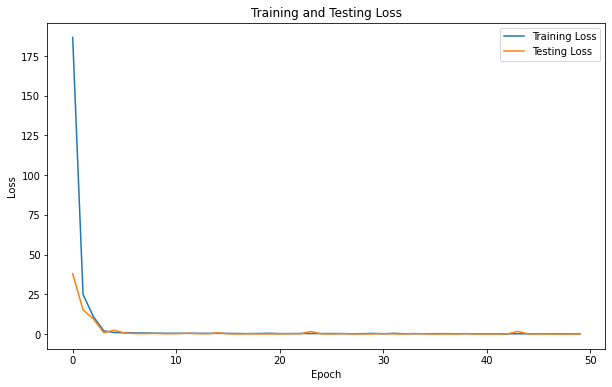

In [26]:
# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(128), input_shape=(train_data.shape[1], train_data.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and record training history
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()